In [192]:
from core.data.models import Models
from core.data.models_dict_v2 import model_dict
from core.data.generate_synthetic_df import generate_synthetic_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

#### Recurrence equation 


$CLV(s,t) = \sum_{s'}^{S} \gamma P(s'|s)[Profit(s',t) + CLV_0(s',t)]\quad t=1,\dots, T; s=1,\dots, k$


- $P(s'|s)$: Transition matrix (simulation)

- $Profit(s',t)$

- $CLV_0(s',t)$: Initial value (random)

- $\gamma = 0.5$

In [193]:
# Create synthetic dataframe over time
def data_over_time(n=100, k=8):
    seed = np.random.randint(1000)
    df = generate_synthetic_df(n, seed)
    # Instantiate an object from the class "Models"
    models = Models(model_dict)
    # Calculate the cost and price
    cost = models.calculate_cost(df)
    pricing = models.calculate_pricing(df)
    # Calculate the profit on the synthetic dataframe
    df["profit"] = models.calculate_profit(cost, pricing)
    df["class"] = list(np.random.randint(k, size=n)+1)
    return(df)

In [194]:
T = 1000
n=100
k=8
PROFIT = np.zeros([T,n])
STATES = np.zeros([T,n])
for i in range(T):
    DATA = data_over_time(n=100, k=8)
    PROFIT[i,:] = DATA["profit"]
    STATES[i,:] = DATA["class"]

In [195]:
DATA

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,class
0,18843,72,1,18941,False,False,Not_Single,0,0,77.752508,5
1,5676,51,6,32339,False,False,Not_Single,0,0,13.397564,8
2,8599,55,7,18931,False,False,Single,1,1,-14.931670,1
3,24984,45,0,39000,False,False,Single,0,0,-77.528604,6
4,21412,63,1,4604,False,False,Not_Single,0,0,53.547675,4
...,...,...,...,...,...,...,...,...,...,...,...
95,7169,63,1,12498,False,False,Single,1,0,17.218119,2
96,15278,44,2,24181,False,False,Single,0,0,-57.115107,5
97,8008,40,5,26610,False,False,Not_Single,0,0,-20.110160,8
98,21352,56,0,13245,False,False,Not_Single,0,1,19.965028,8


In [196]:
profit = pd.DataFrame(PROFIT)
states = pd.DataFrame(STATES)

$Profit(t,n)$

In [197]:
profit

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-91.902656,-45.039893,9.523471,97.935330,-128.274845,44.211068,23.467578,-1.101983,-7.783029,10.884440,...,32.871697,-4.774372,-115.001630,60.966941,75.350245,-45.112961,9.216966,-48.664425,-3.723038,-14.680530
1,-58.882930,64.462355,20.295407,60.184934,8.984803,-13.967814,82.080169,-4.616830,67.360290,34.935772,...,-33.619789,82.563873,6.571928,86.242980,5.905165,-48.795144,-160.239898,-3.157664,-30.703832,-50.323042
2,-24.978380,17.956990,-35.582981,43.242879,44.513825,31.045208,-56.614338,65.187516,-17.871388,-67.720237,...,73.919840,3.657414,30.747618,66.593391,78.965604,-2.055588,-82.079210,25.121304,-8.161970,70.249119
3,11.933549,-66.385445,31.723138,30.577670,-61.298791,79.990968,-55.306882,49.511031,-6.690072,24.712944,...,-133.147180,-6.145005,-10.342929,-85.956696,-12.521765,-142.052890,-97.472212,-28.541415,92.296835,142.708308
4,38.886861,-73.411501,47.123236,24.934946,30.603706,42.007227,-29.893325,19.277755,26.602386,56.354801,...,-122.125401,-143.007856,20.383277,-81.554045,19.144489,40.925090,21.588420,44.346230,-92.481494,-105.907006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70.887302,10.883548,-185.027446,-92.404976,-104.314484,71.975834,9.994601,76.440689,-55.273384,-116.970548,...,8.636805,33.334677,102.289779,26.709481,-14.261248,65.903916,57.178058,-42.957759,-99.215742,81.291052
996,-216.658487,69.545672,-57.637415,37.408395,-9.661263,92.098499,-69.263691,33.507529,89.692066,43.243839,...,-43.275326,-2.392317,12.589471,-67.783440,-10.613059,-17.571798,-28.813262,40.349379,12.399058,69.956356
997,108.926498,-52.259353,5.204293,39.645575,-69.852499,66.824405,-60.119966,20.652605,73.570192,103.227374,...,-69.745787,129.961495,7.770964,8.879537,22.966513,7.578468,-30.920265,25.518066,-167.515218,-139.421705
998,88.264575,161.604554,16.916318,68.618153,-26.796231,15.919345,34.483129,-74.550630,41.717305,55.270730,...,-36.061906,-5.392562,-11.409064,-164.428186,-105.806315,12.378544,-19.689115,80.045103,-25.168585,-78.965722


#### Assuming random states, but it can be improved by the solution of Problem 1

In [229]:
states = states.astype('int')
states

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,3,6,4,5,3,6,7,2,8,...,3,6,5,6,2,2,8,3,1,1
1,3,5,4,8,5,3,3,5,5,3,...,7,8,2,4,5,8,2,2,2,2
2,5,5,3,1,7,3,4,5,7,3,...,6,6,4,5,8,2,7,3,5,3
3,7,2,1,1,3,6,7,3,4,4,...,4,7,4,7,3,1,2,8,3,6
4,7,6,2,6,7,8,3,6,8,6,...,8,8,5,2,7,7,8,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,6,5,6,3,4,1,8,6,3,...,8,4,2,6,8,4,5,4,1,1
996,2,8,8,6,8,6,3,5,3,4,...,5,3,2,4,5,1,7,2,3,3
997,4,1,6,6,5,2,8,1,8,4,...,4,1,8,1,7,1,7,7,4,5
998,8,8,8,7,1,4,7,7,2,2,...,6,8,8,4,1,1,7,7,3,5


In [230]:
state_current = states.iloc[:-1,:]
state_next = states.iloc[1:,:]
STATE_CURRENT = state_current.values.ravel()
STATE_NEXT = state_next.values.ravel()
P = matrix = pd.crosstab(
    pd.Series(STATE_CURRENT, name='from'),
    pd.Series(STATE_NEXT, name='to'),
    normalize=0)

In [231]:
P

to,1,2,3,4,5,6,7,8
from,,,,,,,,
1,0.098873,0.115366,0.166966,0.146065,0.109242,0.130307,0.113896,0.119285
2,0.140455,0.129663,0.120044,0.134121,0.085634,0.135137,0.129428,0.125518
3,0.149330,0.102895,0.123426,0.101933,0.139305,0.091266,0.138183,0.153661
4,0.137253,0.158470,0.132155,0.131743,0.109704,0.130592,0.115461,0.084622
5,0.119822,0.104658,0.095123,0.125215,0.144834,0.123574,0.130686,0.156089
6,0.087600,0.114964,0.136823,0.121538,0.142082,0.120224,0.157038,0.119730
7,0.123937,0.164130,0.109186,0.100211,0.149067,0.150394,0.103723,0.099352
8,0.122873,0.133547,0.117416,0.113403,0.144222,0.092055,0.138443,0.138042


In [232]:
PROFIT = np.zeros([T,k])
for i in range(T):
    PROFIT[i,0] = profit.loc[i,states.iloc[i,:]==1].sum()
    PROFIT[i,1] = profit.loc[i,states.iloc[i,:]==2].sum()
    PROFIT[i,2] = profit.loc[i,states.iloc[i,:]==3].sum()
    PROFIT[i,3] = profit.loc[i,states.iloc[i,:]==4].sum()
    PROFIT[i,4] = profit.loc[i,states.iloc[i,:]==5].sum()
    PROFIT[i,5] = profit.loc[i,states.iloc[i,:]==6].sum()
    PROFIT[i,6] = profit.loc[i,states.iloc[i,:]==7].sum()
    PROFIT[i,7] = profit.loc[i,states.iloc[i,:]==8].sum()
PROFIT = pd.DataFrame(PROFIT)

In [233]:
PROFIT

,0,1,2,3,4,5,6,7
0,82.187870,1.376615,133.972979,682.768051,-112.040910,-33.913423,180.500366,163.947558
1,57.521668,-272.486884,360.717484,38.319450,361.832185,21.210198,-411.592519,-230.136249
2,142.783173,514.096612,150.285966,-153.992270,153.799789,-146.400261,60.974965,161.176490
3,-66.391254,-435.490595,137.561182,-254.452757,5.025217,86.623486,-44.785752,-49.455648
4,358.995180,-71.359847,217.309393,168.083563,226.192477,17.179595,403.594378,-81.734598
...,...,...,...,...,...,...,...,...
995,41.211611,89.121211,-442.090682,264.150038,-580.998093,-110.628563,-343.383042,32.847705
996,168.976042,-190.515621,232.118104,-60.870151,-117.386218,272.925394,89.324721,238.659536
997,268.567340,-246.825231,159.012435,-45.596335,470.951196,87.415819,120.842636,-116.360680
998,-76.144376,250.089147,-623.222312,-160.237932,196.342718,299.976452,171.424731,-162.565824


#### Initial value condition of $CLV_0 = 0$

In [235]:
CLV_0 = pd.DataFrame(np.zeros([T,k]))

In [236]:
CLV_0

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
gamma = 0.85

$CLV(s,t) = \sum_{s'}^{S} \gamma P(s'|s)[Profit(s',t) + CLV(s',t)]$

In [238]:
CLV = pd.DataFrame(gamma*P.values@(PROFIT.T.values+CLV_0.T.values)).T

<AxesSubplot:>

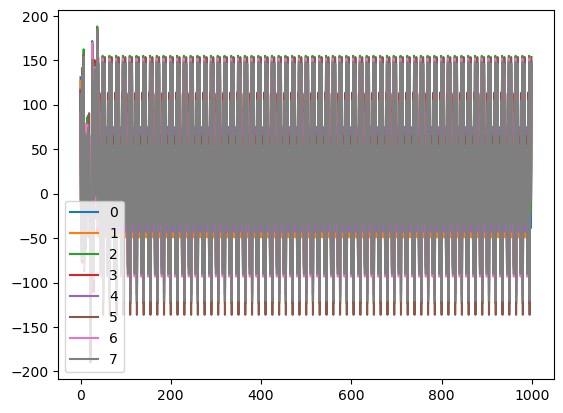

In [239]:
CLV.plot()

In [240]:
MAE = mae(CLV,CLV_0)
print(MAE)

61.5901574281051


In [241]:
error = 0.001
kk = 0
while(MAE>error):
    print(kk)
    CLV_0 = CLV
    CLV = pd.DataFrame(gamma*P.values@(PROFIT.T.values+CLV_0.T.values)).T
    MAE = mae(CLV,CLV_0)
    kk+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


<AxesSubplot:>

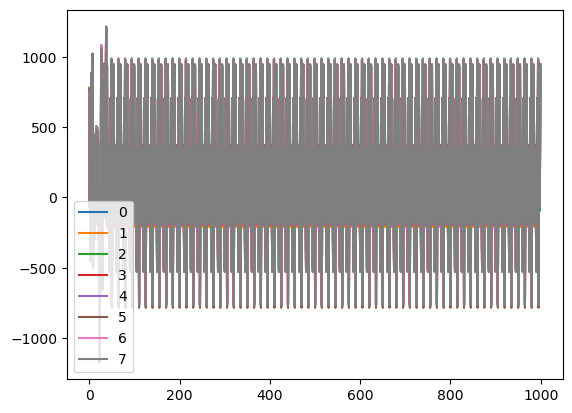

In [242]:
CLV.plot()

### **Observation**: The dynamic is artficial

- Depends on the initial distribution of CLV, 

- The realization sequences of the profits: may be more meaningful with real data

- and the syntetic transition matrix